In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from typing import List, Optional, Tuple

import corner


In [2]:
from starccato_flow.data.toy_data import ToyData
from starccato_flow.data.ccsn_data import CCSNData
from starccato_flow.data.ccsn_snr_data import CCSNSNRData
from starccato_flow.training.trainer import Trainer

from starccato_flow.plotting.plotting import plot_reconstruction_distribution

/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from starccato_flow.utils.defaults import DEVICE

### Dataset

In [4]:
# train_dataset = ToyData(num_signals=1684, signal_length=256)
# validation_dataset = ToyData(num_signals=round(1684 * 0.1), signal_length=256)

### Dataset Plots

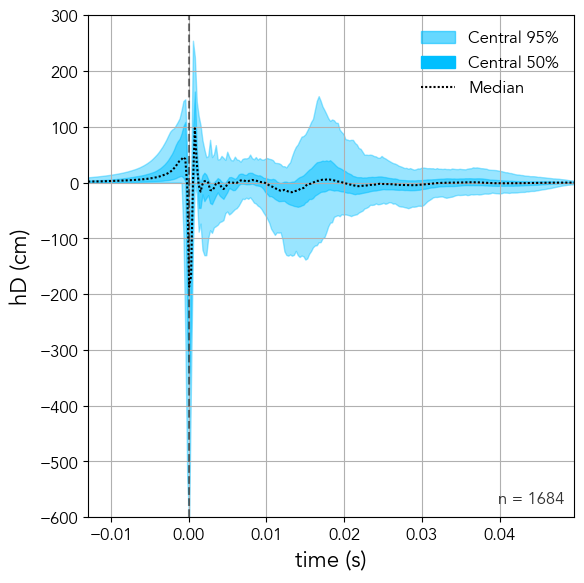

In [ ]:
ccsn_dataset = CCSNData(noise=True, curriculum=True)
ccsn_dataset.plot_signal_distribution(background="white", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_distribution.svg")

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


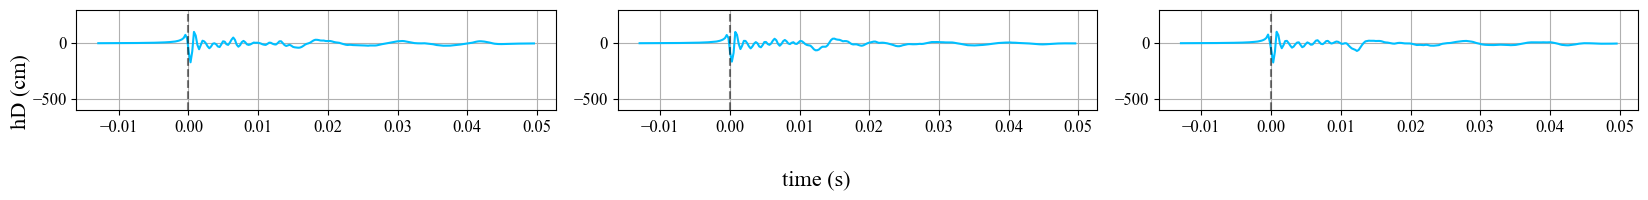

In [6]:
ccsn_dataset.plot_signal_grid(background="white", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_grid.svg")

In [7]:
toy=False

### Train VAE + Flow


Verifying data alignment:
Number of signals: 1684
Number of parameter sets: 1684
Parameter columns: ['beta1_IC_b', 'A(km)', 'Ye_c_b', 'omega_0(rad|s)']
First few parameter values:
   beta1_IC_b  A(km)  Ye_c_b  omega_0(rad|s)
1    0.000749    634  0.2465             0.5
2    0.002987    634  0.2465             1.0
3    0.006661    634  0.2465             1.5
4    0.011734    634  0.2465             2.0
5    0.017965    634  0.2465             2.5

Verifying data alignment:
Number of signals: 1684
Number of parameter sets: 1684
Parameter columns: ['beta1_IC_b', 'A(km)', 'Ye_c_b', 'omega_0(rad|s)']
First few parameter values:
   beta1_IC_b  A(km)  Ye_c_b  omega_0(rad|s)
1    0.000749    634  0.2465             0.5
2    0.002987    634  0.2465             1.0
3    0.006661    634  0.2465             1.5
4    0.011734    634  0.2465             2.0
5    0.017965    634  0.2465             2.5
Training samples: 1516
Validation samples: 168


Epochs:   0%|          | 0/256 [00:00<?, ?it/s]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1

Epoch 1/256 | Train Loss: 169.8943 | Val Loss: 86.4419


Epochs:   1%|          | 2/256 [00:05<11:01,  2.61s/it]

Epoch 2/256 | Train Loss: 69.6563 | Val Loss: 62.9924


Epochs:   1%|          | 3/256 [00:07<10:49,  2.57s/it]

Epoch 3/256 | Train Loss: 57.2048 | Val Loss: 55.4765


Epochs:   2%|▏         | 4/256 [00:10<10:19,  2.46s/it]

Epoch 4/256 | Train Loss: 51.5078 | Val Loss: 53.5344


Epochs:   2%|▏         | 5/256 [00:12<09:50,  2.35s/it]

Epoch 5/256 | Train Loss: 48.3711 | Val Loss: 51.1853


Epochs:   2%|▏         | 6/256 [00:14<09:35,  2.30s/it]

Epoch 6/256 | Train Loss: 46.2226 | Val Loss: 48.6883


Epochs:   3%|▎         | 7/256 [00:16<09:19,  2.25s/it]

Epoch 7/256 | Train Loss: 44.6228 | Val Loss: 46.8262


Epochs:   3%|▎         | 8/256 [00:19<09:30,  2.30s/it]

Epoch 8/256 | Train Loss: 43.3927 | Val Loss: 46.0070


Epochs:   4%|▎         | 9/256 [00:21<09:42,  2.36s/it]

Epoch 9/256 | Train Loss: 42.1920 | Val Loss: 44.2411


Epochs:   4%|▍         | 10/256 [00:23<09:36,  2.34s/it]

Epoch 10/256 | Train Loss: 40.8654 | Val Loss: 43.7302


Epochs:   4%|▍         | 11/256 [00:26<09:30,  2.33s/it]

Epoch 11/256 | Train Loss: 40.4818 | Val Loss: 43.9007


Epochs:   5%|▍         | 12/256 [00:28<09:26,  2.32s/it]

Epoch 12/256 | Train Loss: 39.1999 | Val Loss: 42.1849


Epochs:   5%|▌         | 13/256 [00:30<09:22,  2.31s/it]

Epoch 13/256 | Train Loss: 38.3365 | Val Loss: 42.2551


Epochs:   5%|▌         | 14/256 [00:33<09:17,  2.30s/it]

Epoch 14/256 | Train Loss: 37.7701 | Val Loss: 41.9520


Epochs:   6%|▌         | 15/256 [00:35<09:41,  2.41s/it]

Epoch 15/256 | Train Loss: 37.1649 | Val Loss: 41.4706
Epoch 16/256 | Train Loss: 37.0925 | Val Loss: 41.0421
Generated signals shape: (32, 256)
Epoch 16/256 | Train Loss: 37.0925 | Val Loss: 41.0421
Generated signals shape: (32, 256)


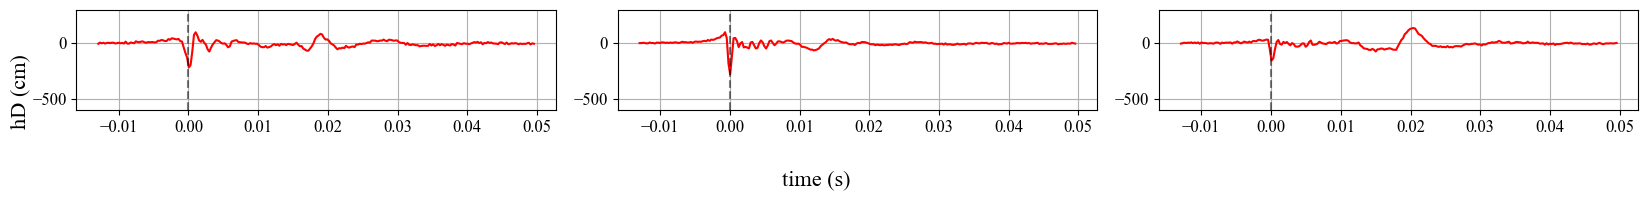

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


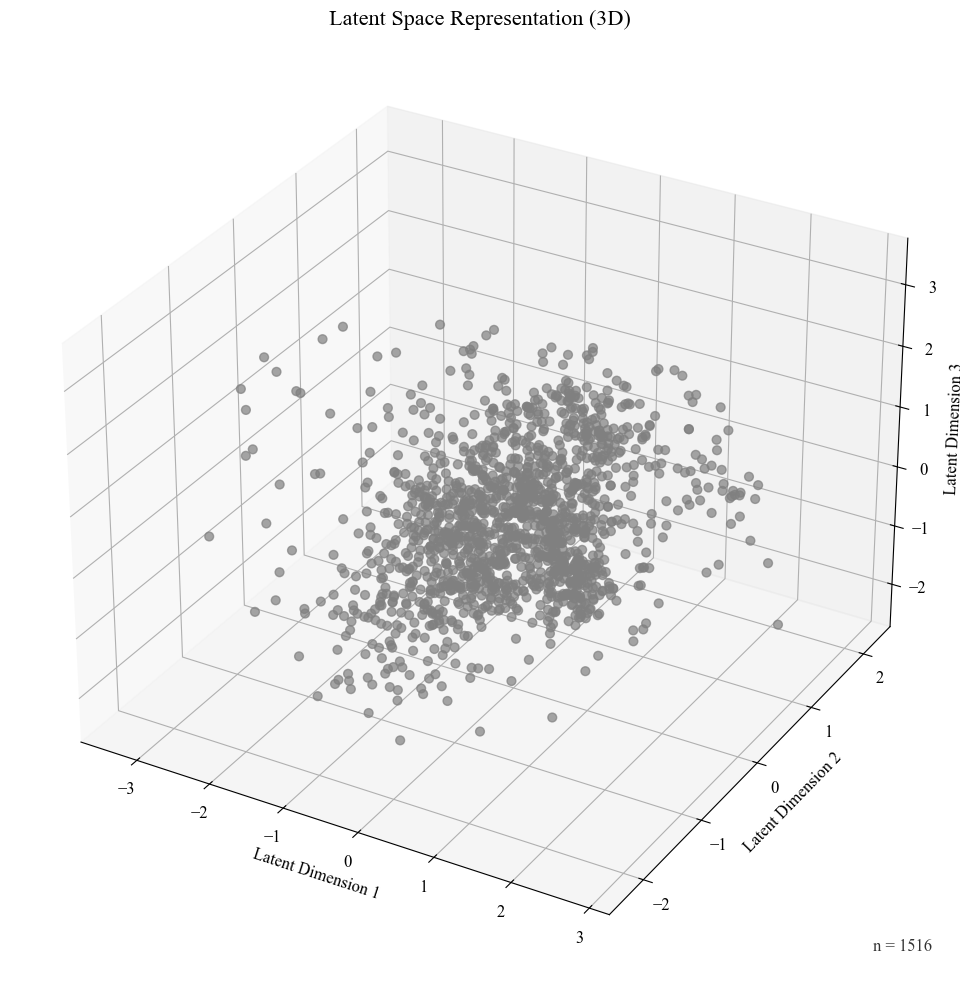

Epochs:   6%|▋         | 16/256 [00:39<11:39,  2.91s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 17/256 | Train Loss: 36.9098 | Val Loss: 41.3591


Epochs:   7%|▋         | 18/256 [00:44<10:11,  2.57s/it]

Epoch 18/256 | Train Loss: 36.1505 | Val Loss: 41.0169


Epochs:   7%|▋         | 19/256 [00:46<09:43,  2.46s/it]

Epoch 19/256 | Train Loss: 35.8917 | Val Loss: 40.6991


Epochs:   8%|▊         | 20/256 [00:48<09:21,  2.38s/it]

Epoch 20/256 | Train Loss: 35.8671 | Val Loss: 38.9547


Epochs:   8%|▊         | 21/256 [00:50<09:05,  2.32s/it]

Epoch 21/256 | Train Loss: 35.4324 | Val Loss: 40.8627


Epochs:   9%|▊         | 22/256 [00:53<09:03,  2.32s/it]

Epoch 22/256 | Train Loss: 35.0005 | Val Loss: 38.9377


Epochs:   9%|▉         | 23/256 [00:55<08:52,  2.29s/it]

Epoch 23/256 | Train Loss: 34.8519 | Val Loss: 39.4527


Epochs:   9%|▉         | 24/256 [00:57<08:42,  2.25s/it]

Epoch 24/256 | Train Loss: 34.4448 | Val Loss: 38.4973


Epochs:  10%|▉         | 25/256 [00:59<08:37,  2.24s/it]

Epoch 25/256 | Train Loss: 34.4768 | Val Loss: 39.0638


Epochs:  10%|█         | 26/256 [01:01<08:29,  2.22s/it]

Epoch 26/256 | Train Loss: 33.9296 | Val Loss: 38.3013


Epochs:  11%|█         | 27/256 [01:04<08:24,  2.20s/it]

Epoch 27/256 | Train Loss: 33.7935 | Val Loss: 38.1203


Epochs:  11%|█         | 28/256 [01:06<08:20,  2.20s/it]

Epoch 28/256 | Train Loss: 33.8614 | Val Loss: 39.3820


Epochs:  11%|█▏        | 29/256 [01:08<08:22,  2.21s/it]

Epoch 29/256 | Train Loss: 33.4285 | Val Loss: 37.6078


Epochs:  12%|█▏        | 30/256 [01:10<08:17,  2.20s/it]

Epoch 30/256 | Train Loss: 33.2826 | Val Loss: 37.8711


Epochs:  12%|█▏        | 31/256 [01:12<08:12,  2.19s/it]

Epoch 31/256 | Train Loss: 33.3923 | Val Loss: 38.3538
Epoch 32/256 | Train Loss: 32.9238 | Val Loss: 38.4286
Generated signals shape: (32, 256)
Epoch 32/256 | Train Loss: 32.9238 | Val Loss: 38.4286
Generated signals shape: (32, 256)


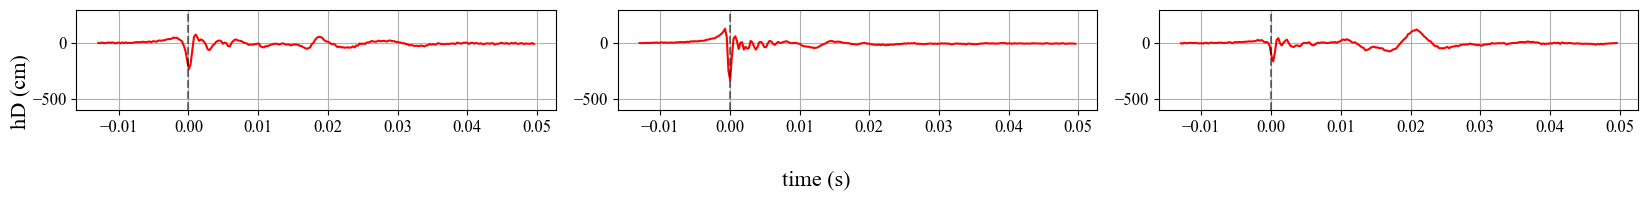

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


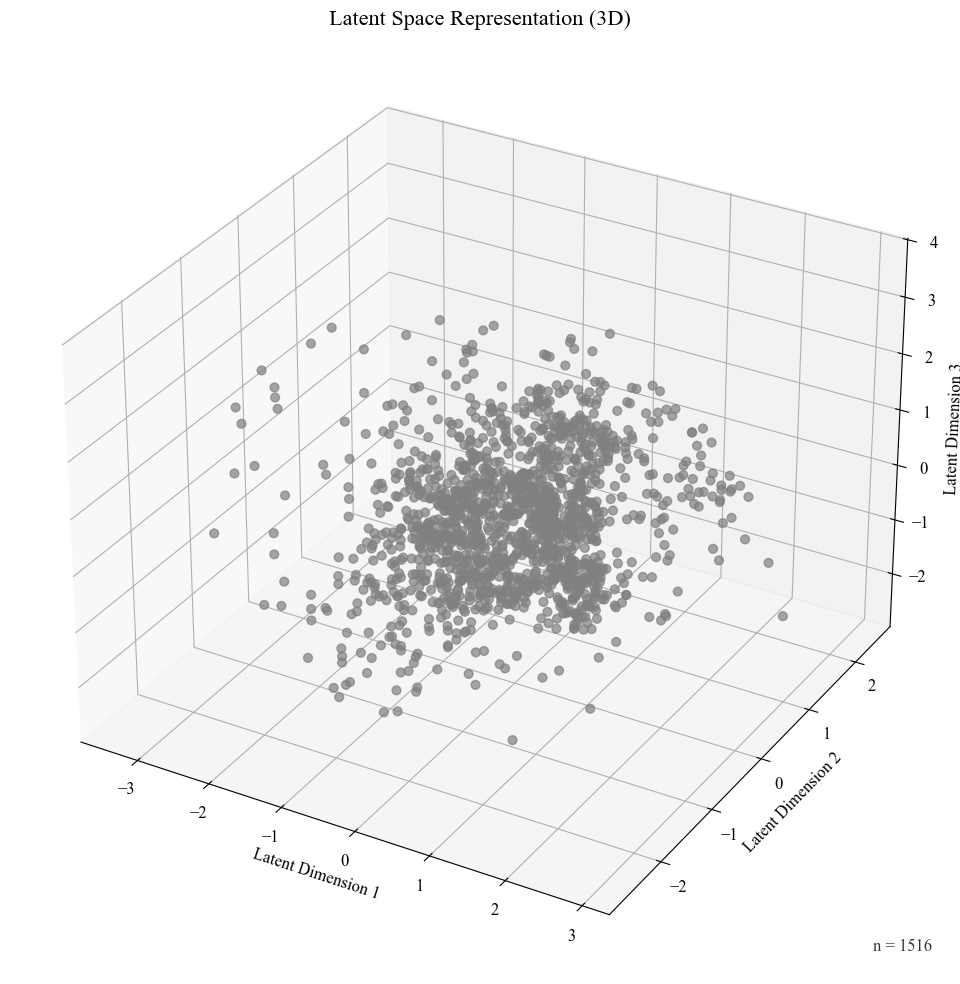

Epochs:  12%|█▎        | 32/256 [01:16<10:03,  2.70s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 33/256 | Train Loss: 32.8754 | Val Loss: 38.2377


Epochs:  13%|█▎        | 34/256 [01:21<09:02,  2.44s/it]

Epoch 34/256 | Train Loss: 32.9826 | Val Loss: 37.0547


Epochs:  14%|█▎        | 35/256 [01:23<08:52,  2.41s/it]

Epoch 35/256 | Train Loss: 32.7003 | Val Loss: 37.8265


Epochs:  14%|█▍        | 36/256 [01:25<08:31,  2.32s/it]

Epoch 36/256 | Train Loss: 32.4520 | Val Loss: 37.4351


Epochs:  14%|█▍        | 37/256 [01:27<08:19,  2.28s/it]

Epoch 37/256 | Train Loss: 32.3810 | Val Loss: 36.1950


Epochs:  15%|█▍        | 38/256 [01:54<34:40,  9.54s/it]

Epoch 38/256 | Train Loss: 32.2510 | Val Loss: 37.3618


Epochs:  15%|█▌        | 39/256 [01:56<26:34,  7.35s/it]

Epoch 39/256 | Train Loss: 32.2835 | Val Loss: 36.9981


Epochs:  16%|█▌        | 40/256 [01:58<21:06,  5.86s/it]

Epoch 40/256 | Train Loss: 32.1739 | Val Loss: 37.1654


Epochs:  16%|█▌        | 41/256 [02:01<17:19,  4.83s/it]

Epoch 41/256 | Train Loss: 32.4230 | Val Loss: 38.2229


Epochs:  16%|█▋        | 42/256 [02:03<14:34,  4.09s/it]

Epoch 42/256 | Train Loss: 31.6937 | Val Loss: 36.3266


Epochs:  17%|█▋        | 43/256 [02:05<12:31,  3.53s/it]

Epoch 43/256 | Train Loss: 31.4277 | Val Loss: 37.5627


Epochs:  17%|█▋        | 44/256 [02:08<11:10,  3.16s/it]

Epoch 44/256 | Train Loss: 31.5807 | Val Loss: 37.7831


Epochs:  18%|█▊        | 45/256 [02:10<10:15,  2.92s/it]

Epoch 45/256 | Train Loss: 31.2037 | Val Loss: 36.5598


Epochs:  18%|█▊        | 46/256 [02:12<09:32,  2.73s/it]

Epoch 46/256 | Train Loss: 31.4200 | Val Loss: 37.0569


Epochs:  18%|█▊        | 47/256 [02:15<09:02,  2.60s/it]

Epoch 47/256 | Train Loss: 31.4256 | Val Loss: 37.1484
Epoch 48/256 | Train Loss: 31.1198 | Val Loss: 37.0271
Generated signals shape: (32, 256)
Epoch 48/256 | Train Loss: 31.1198 | Val Loss: 37.0271
Generated signals shape: (32, 256)


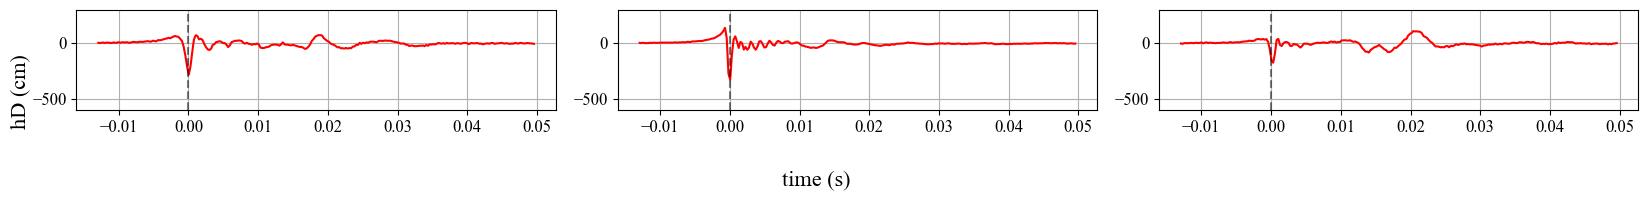

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


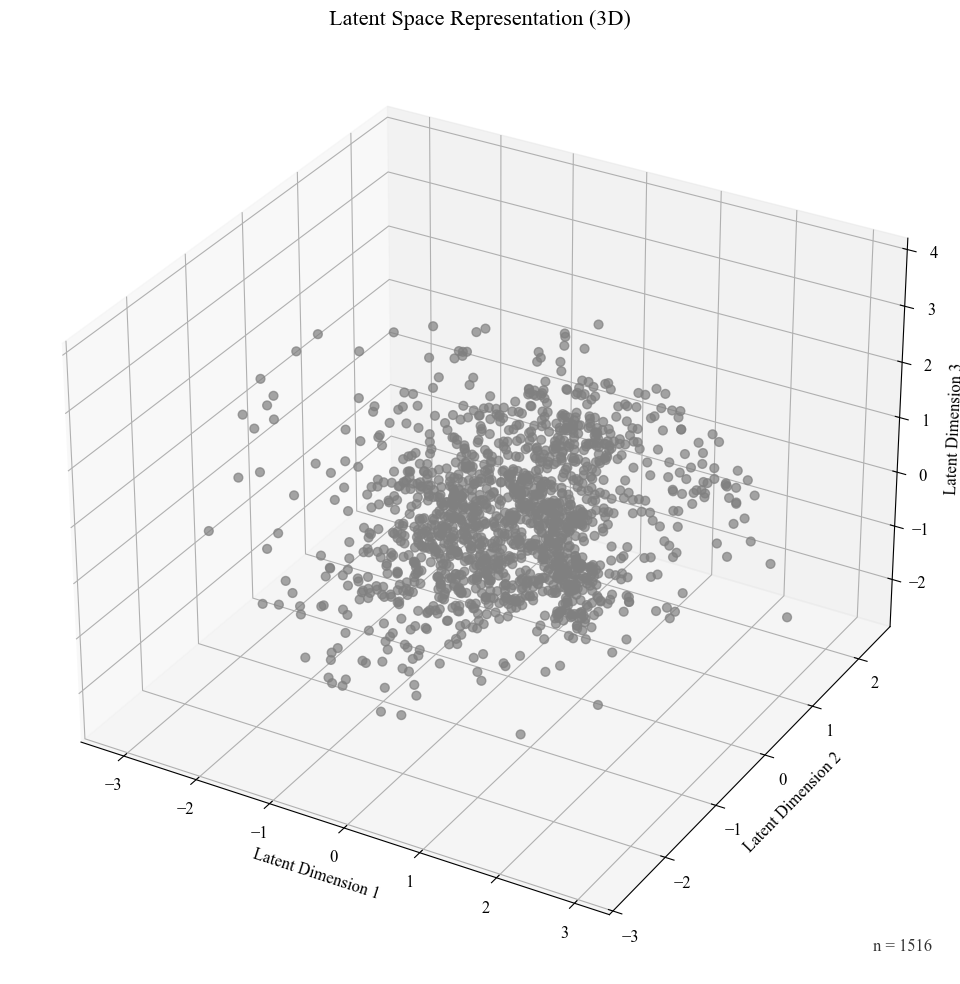

Epochs:  19%|█▉        | 48/256 [02:18<10:17,  2.97s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 49/256 | Train Loss: 29.4038 | Val Loss: 35.2090


Epochs:  20%|█▉        | 50/256 [02:23<08:55,  2.60s/it]

Epoch 50/256 | Train Loss: 29.0422 | Val Loss: 34.4664


Epochs:  20%|█▉        | 51/256 [02:25<08:33,  2.51s/it]

Epoch 51/256 | Train Loss: 28.8963 | Val Loss: 34.5011


Epochs:  20%|██        | 52/256 [02:28<08:18,  2.44s/it]

Epoch 52/256 | Train Loss: 28.7269 | Val Loss: 34.4971


Epochs:  21%|██        | 53/256 [02:30<08:00,  2.37s/it]

Epoch 53/256 | Train Loss: 28.6974 | Val Loss: 34.5037


Epochs:  21%|██        | 54/256 [02:32<07:51,  2.33s/it]

Epoch 54/256 | Train Loss: 28.5489 | Val Loss: 34.1214


Epochs:  21%|██▏       | 55/256 [02:34<07:37,  2.27s/it]

Epoch 55/256 | Train Loss: 28.4846 | Val Loss: 34.8561


Epochs:  22%|██▏       | 56/256 [02:36<07:34,  2.27s/it]

Epoch 56/256 | Train Loss: 28.3536 | Val Loss: 34.3007


Epochs:  22%|██▏       | 57/256 [02:39<07:36,  2.29s/it]

Epoch 57/256 | Train Loss: 28.3441 | Val Loss: 33.7080


Epochs:  23%|██▎       | 58/256 [02:41<07:25,  2.25s/it]

Epoch 58/256 | Train Loss: 28.4783 | Val Loss: 34.2643


Epochs:  23%|██▎       | 59/256 [02:43<07:21,  2.24s/it]

Epoch 59/256 | Train Loss: 28.4749 | Val Loss: 34.3652


Epochs:  23%|██▎       | 60/256 [02:45<07:21,  2.25s/it]

Epoch 60/256 | Train Loss: 28.3715 | Val Loss: 34.2752


Epochs:  24%|██▍       | 61/256 [02:48<07:15,  2.23s/it]

Epoch 61/256 | Train Loss: 28.2938 | Val Loss: 34.0046


Epochs:  24%|██▍       | 62/256 [02:50<07:12,  2.23s/it]

Epoch 62/256 | Train Loss: 28.2732 | Val Loss: 34.1772


Epochs:  25%|██▍       | 63/256 [02:52<07:08,  2.22s/it]

Epoch 63/256 | Train Loss: 28.1579 | Val Loss: 34.2703
Epoch 64/256 | Train Loss: 27.8643 | Val Loss: 34.3608
Generated signals shape: (32, 256)
Epoch 64/256 | Train Loss: 27.8643 | Val Loss: 34.3608
Generated signals shape: (32, 256)


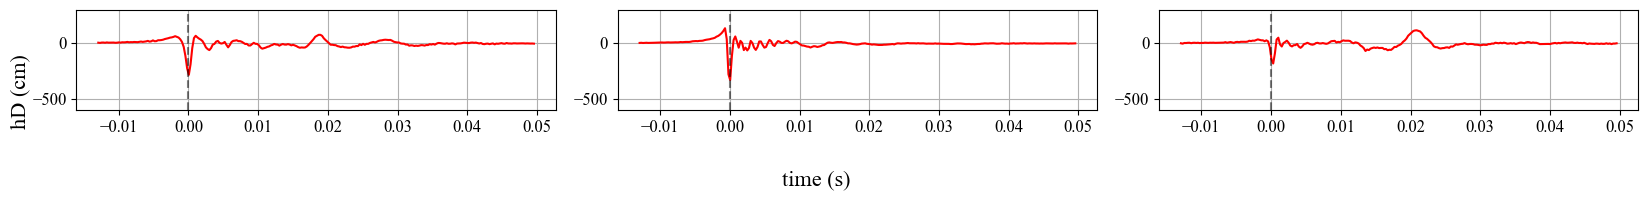

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


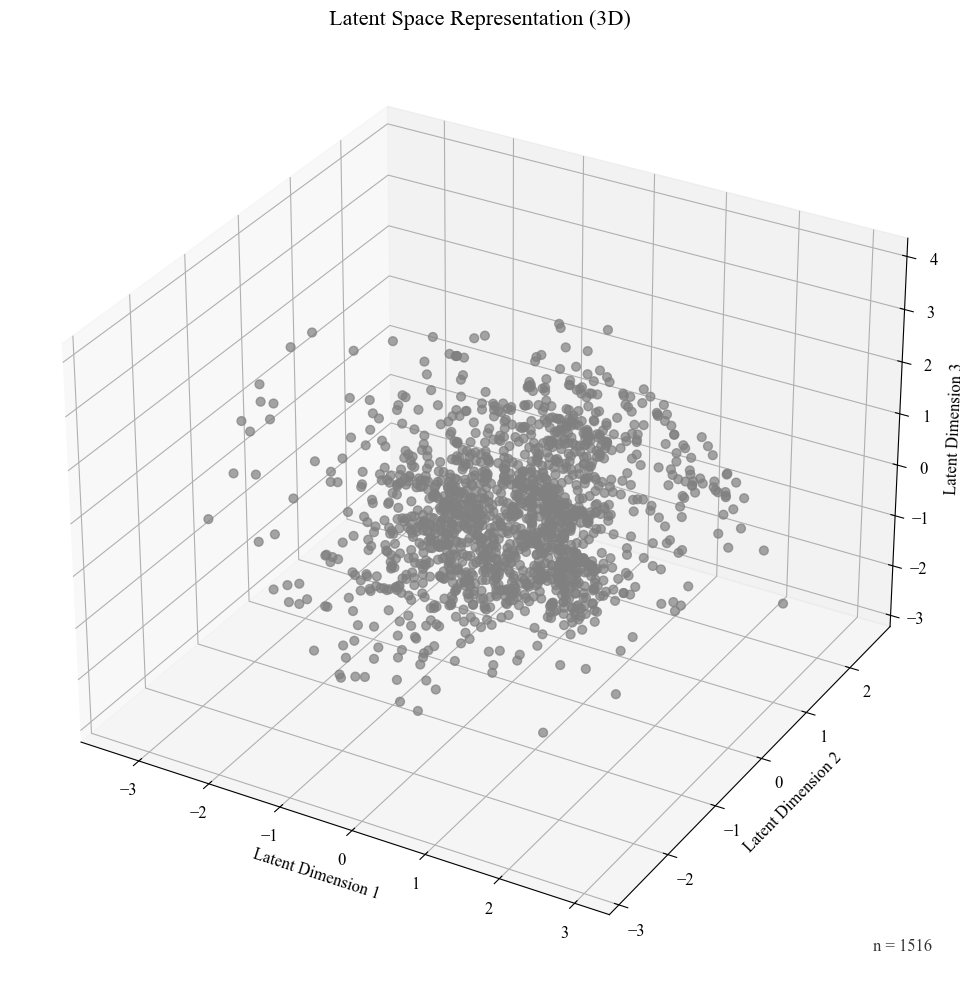

Epochs:  25%|██▌       | 64/256 [02:56<08:49,  2.76s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 65/256 | Train Loss: 27.9696 | Val Loss: 34.8351


Epochs:  26%|██▌       | 66/256 [03:01<07:57,  2.51s/it]

Epoch 66/256 | Train Loss: 28.0862 | Val Loss: 34.0922


Epochs:  26%|██▌       | 67/256 [03:03<07:38,  2.43s/it]

Epoch 67/256 | Train Loss: 28.1154 | Val Loss: 34.4999


Epochs:  27%|██▋       | 68/256 [03:05<07:36,  2.43s/it]

Epoch 68/256 | Train Loss: 27.8270 | Val Loss: 33.6199


Epochs:  27%|██▋       | 69/256 [03:08<07:37,  2.45s/it]

Epoch 69/256 | Train Loss: 28.0343 | Val Loss: 34.0042


Epochs:  27%|██▋       | 70/256 [03:10<07:28,  2.41s/it]

Epoch 70/256 | Train Loss: 27.8052 | Val Loss: 34.2577


Epochs:  28%|██▊       | 71/256 [03:13<07:44,  2.51s/it]

Epoch 71/256 | Train Loss: 27.8306 | Val Loss: 34.2133


Epochs:  28%|██▊       | 72/256 [03:16<08:16,  2.70s/it]

Epoch 72/256 | Train Loss: 27.7519 | Val Loss: 34.1715


Epochs:  29%|██▊       | 73/256 [03:18<07:51,  2.58s/it]

Epoch 73/256 | Train Loss: 27.7185 | Val Loss: 34.3089


Epochs:  29%|██▉       | 74/256 [03:20<07:28,  2.46s/it]

Epoch 74/256 | Train Loss: 27.6883 | Val Loss: 34.8094


Epochs:  29%|██▉       | 75/256 [03:23<07:14,  2.40s/it]

Epoch 75/256 | Train Loss: 27.7892 | Val Loss: 33.6790


Epochs:  30%|██▉       | 76/256 [03:25<07:00,  2.33s/it]

Epoch 76/256 | Train Loss: 27.8170 | Val Loss: 33.6560


Epochs:  30%|███       | 77/256 [03:27<06:53,  2.31s/it]

Epoch 77/256 | Train Loss: 27.5319 | Val Loss: 34.0061


Epochs:  30%|███       | 78/256 [03:30<06:57,  2.35s/it]

Epoch 78/256 | Train Loss: 27.5800 | Val Loss: 34.0088


Epochs:  31%|███       | 79/256 [03:32<06:55,  2.35s/it]

Epoch 79/256 | Train Loss: 27.3463 | Val Loss: 33.6158
Epoch 80/256 | Train Loss: 27.3617 | Val Loss: 33.7152
Generated signals shape: (32, 256)
Epoch 80/256 | Train Loss: 27.3617 | Val Loss: 33.7152
Generated signals shape: (32, 256)


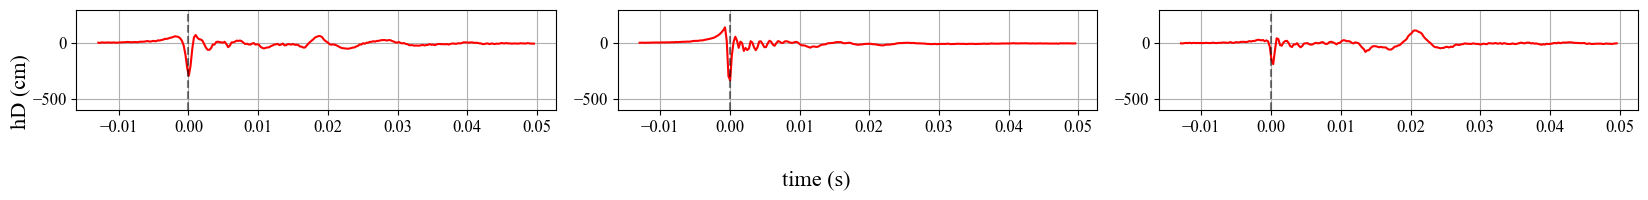

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


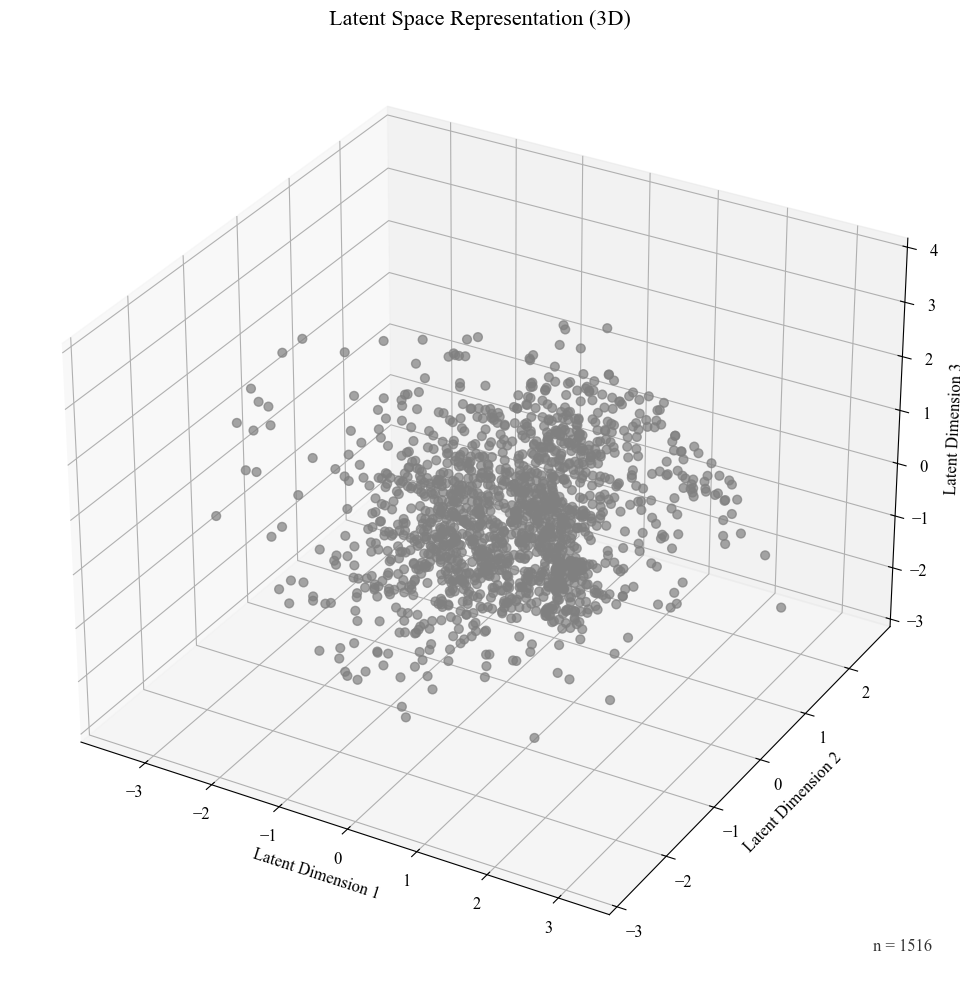

Epochs:  31%|███▏      | 80/256 [03:36<08:14,  2.81s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 81/256 | Train Loss: 27.3792 | Val Loss: 33.4706


Epochs:  32%|███▏      | 82/256 [03:40<07:25,  2.56s/it]

Epoch 82/256 | Train Loss: 27.3594 | Val Loss: 33.8356


Epochs:  32%|███▏      | 83/256 [03:43<07:15,  2.52s/it]

Epoch 83/256 | Train Loss: 27.5101 | Val Loss: 33.5442


Epochs:  33%|███▎      | 84/256 [03:45<06:58,  2.44s/it]

Epoch 84/256 | Train Loss: 27.2299 | Val Loss: 34.0738


Epochs:  33%|███▎      | 85/256 [03:47<06:44,  2.37s/it]

Epoch 85/256 | Train Loss: 27.2014 | Val Loss: 33.9356


Epochs:  34%|███▎      | 86/256 [03:50<06:39,  2.35s/it]

Epoch 86/256 | Train Loss: 27.3328 | Val Loss: 33.4539


Epochs:  34%|███▍      | 87/256 [03:52<06:37,  2.35s/it]

Epoch 87/256 | Train Loss: 27.2096 | Val Loss: 34.0067


Epochs:  34%|███▍      | 88/256 [03:54<06:33,  2.34s/it]

Epoch 88/256 | Train Loss: 27.0924 | Val Loss: 33.9892


Epochs:  35%|███▍      | 89/256 [03:57<06:32,  2.35s/it]

Epoch 89/256 | Train Loss: 27.2066 | Val Loss: 33.7571


Epochs:  35%|███▌      | 90/256 [03:59<06:29,  2.35s/it]

Epoch 90/256 | Train Loss: 27.1613 | Val Loss: 34.0575


Epochs:  36%|███▌      | 91/256 [04:02<06:45,  2.46s/it]

Epoch 91/256 | Train Loss: 27.2103 | Val Loss: 33.7579


Epochs:  36%|███▌      | 92/256 [04:04<06:45,  2.47s/it]

Epoch 92/256 | Train Loss: 27.1571 | Val Loss: 33.5090


Epochs:  36%|███▋      | 93/256 [04:07<06:44,  2.48s/it]

Epoch 93/256 | Train Loss: 27.1811 | Val Loss: 33.9172


Epochs:  37%|███▋      | 94/256 [04:09<06:34,  2.43s/it]

Epoch 94/256 | Train Loss: 26.9543 | Val Loss: 33.6770


Epochs:  37%|███▋      | 95/256 [04:11<06:26,  2.40s/it]

Epoch 95/256 | Train Loss: 27.1652 | Val Loss: 33.4836
Epoch 96/256 | Train Loss: 26.8168 | Val Loss: 33.4033
Generated signals shape: (32, 256)
Epoch 96/256 | Train Loss: 26.8168 | Val Loss: 33.4033
Generated signals shape: (32, 256)


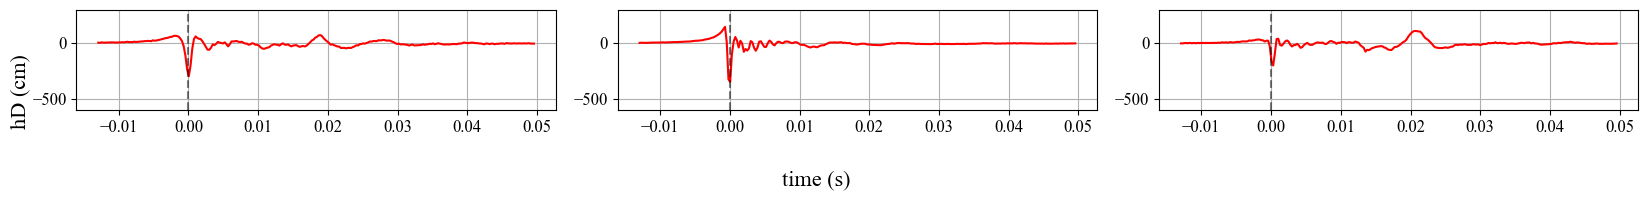

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


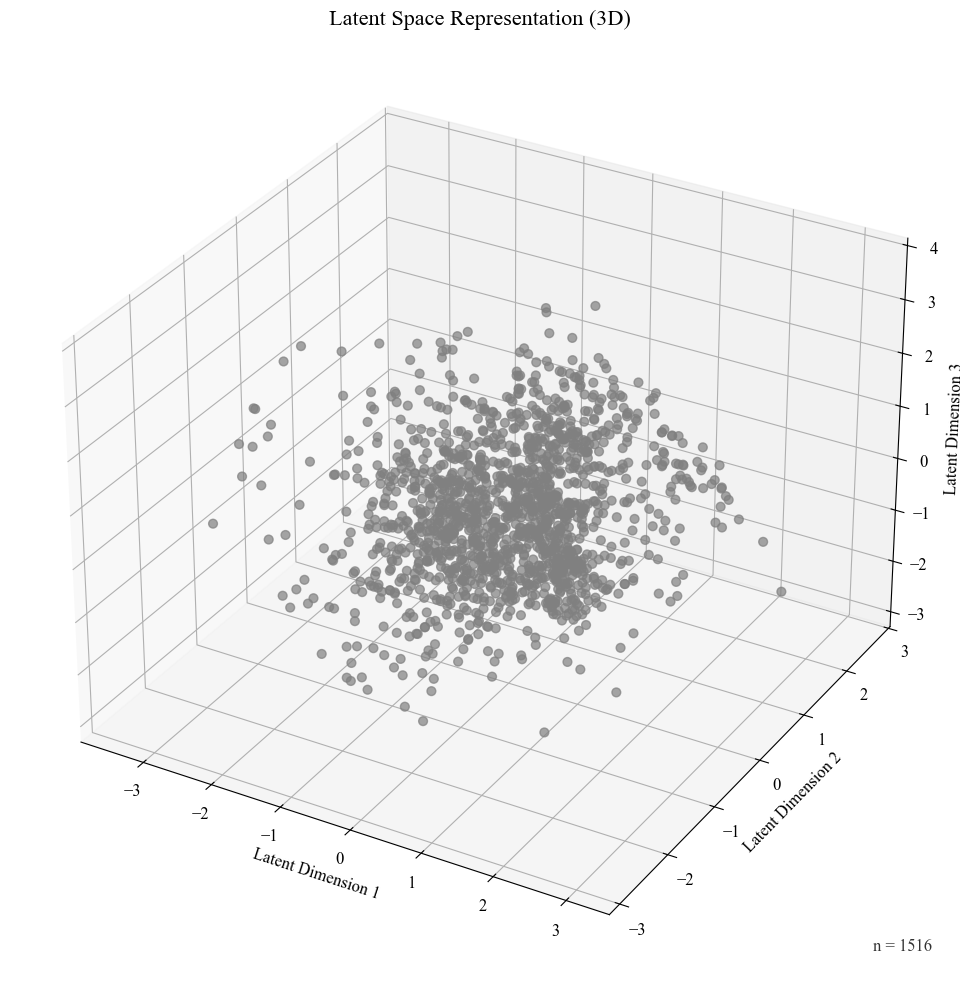

Epochs:  38%|███▊      | 96/256 [04:15<07:46,  2.92s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 97/256 | Train Loss: 26.8670 | Val Loss: 34.0210


Epochs:  38%|███▊      | 98/256 [04:20<06:49,  2.59s/it]

Epoch 98/256 | Train Loss: 26.9261 | Val Loss: 33.8337


Epochs:  39%|███▊      | 99/256 [04:22<06:37,  2.53s/it]

Epoch 99/256 | Train Loss: 26.7929 | Val Loss: 33.2433


Epochs:  39%|███▉      | 100/256 [04:25<06:36,  2.54s/it]

Epoch 100/256 | Train Loss: 26.6952 | Val Loss: 33.5777


Epochs:  39%|███▉      | 101/256 [04:27<06:17,  2.44s/it]

Epoch 101/256 | Train Loss: 26.8142 | Val Loss: 34.0967


Epochs:  40%|███▉      | 102/256 [04:29<06:09,  2.40s/it]

Epoch 102/256 | Train Loss: 26.7959 | Val Loss: 33.6030


Epochs:  40%|████      | 103/256 [04:32<06:06,  2.40s/it]

Epoch 103/256 | Train Loss: 26.6851 | Val Loss: 33.3806


In [ ]:
vae_trainer = Trainer(toy=toy, noise=True, curriculum=True)
vae_trainer.train()


Verifying data alignment:
Number of signals: 1684
Number of parameter sets: 1684
Parameter columns: ['beta1_IC_b', 'A(km)', 'Ye_c_b', 'omega_0(rad|s)']
First few parameter values:
   beta1_IC_b  A(km)  Ye_c_b  omega_0(rad|s)
1    0.000749    634  0.2465             0.5
2    0.002987    634  0.2465             1.0
3    0.006661    634  0.2465             1.5
4    0.011734    634  0.2465             2.0
5    0.017965    634  0.2465             2.5

Verifying data alignment:
Number of signals: 1684
Number of parameter sets: 1684
Parameter columns: ['beta1_IC_b', 'A(km)', 'Ye_c_b', 'omega_0(rad|s)']
First few parameter values:
   beta1_IC_b  A(km)  Ye_c_b  omega_0(rad|s)
1    0.000749    634  0.2465             0.5
2    0.002987    634  0.2465             1.0
3    0.006661    634  0.2465             1.5
4    0.011734    634  0.2465             2.0
5    0.017965    634  0.2465             2.5
Training samples: 1516
Validation samples: 168


Epochs:   0%|          | 0/256 [00:00<?, ?it/s]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1

Epoch 1/256 | Train Loss: 169.8943 | Val Loss: 86.4419


Epochs:   1%|          | 2/256 [00:05<11:01,  2.61s/it]

Epoch 2/256 | Train Loss: 69.6563 | Val Loss: 62.9924


Epochs:   1%|          | 3/256 [00:07<10:49,  2.57s/it]

Epoch 3/256 | Train Loss: 57.2048 | Val Loss: 55.4765


Epochs:   2%|▏         | 4/256 [00:10<10:19,  2.46s/it]

Epoch 4/256 | Train Loss: 51.5078 | Val Loss: 53.5344


Epochs:   2%|▏         | 5/256 [00:12<09:50,  2.35s/it]

Epoch 5/256 | Train Loss: 48.3711 | Val Loss: 51.1853


Epochs:   2%|▏         | 6/256 [00:14<09:35,  2.30s/it]

Epoch 6/256 | Train Loss: 46.2226 | Val Loss: 48.6883


Epochs:   3%|▎         | 7/256 [00:16<09:19,  2.25s/it]

Epoch 7/256 | Train Loss: 44.6228 | Val Loss: 46.8262


Epochs:   3%|▎         | 8/256 [00:19<09:30,  2.30s/it]

Epoch 8/256 | Train Loss: 43.3927 | Val Loss: 46.0070


Epochs:   4%|▎         | 9/256 [00:21<09:42,  2.36s/it]

Epoch 9/256 | Train Loss: 42.1920 | Val Loss: 44.2411


Epochs:   4%|▍         | 10/256 [00:23<09:36,  2.34s/it]

Epoch 10/256 | Train Loss: 40.8654 | Val Loss: 43.7302


Epochs:   4%|▍         | 11/256 [00:26<09:30,  2.33s/it]

Epoch 11/256 | Train Loss: 40.4818 | Val Loss: 43.9007


Epochs:   5%|▍         | 12/256 [00:28<09:26,  2.32s/it]

Epoch 12/256 | Train Loss: 39.1999 | Val Loss: 42.1849


Epochs:   5%|▌         | 13/256 [00:30<09:22,  2.31s/it]

Epoch 13/256 | Train Loss: 38.3365 | Val Loss: 42.2551


Epochs:   5%|▌         | 14/256 [00:33<09:17,  2.30s/it]

Epoch 14/256 | Train Loss: 37.7701 | Val Loss: 41.9520


Epochs:   6%|▌         | 15/256 [00:35<09:41,  2.41s/it]

Epoch 15/256 | Train Loss: 37.1649 | Val Loss: 41.4706
Epoch 16/256 | Train Loss: 37.0925 | Val Loss: 41.0421
Generated signals shape: (32, 256)
Epoch 16/256 | Train Loss: 37.0925 | Val Loss: 41.0421
Generated signals shape: (32, 256)


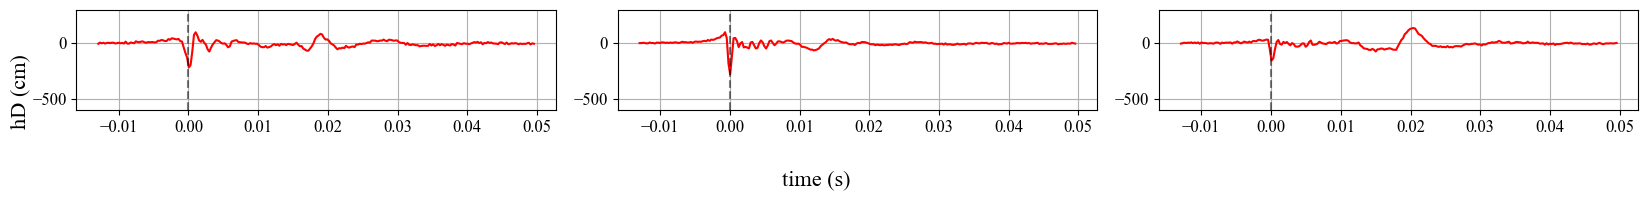

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


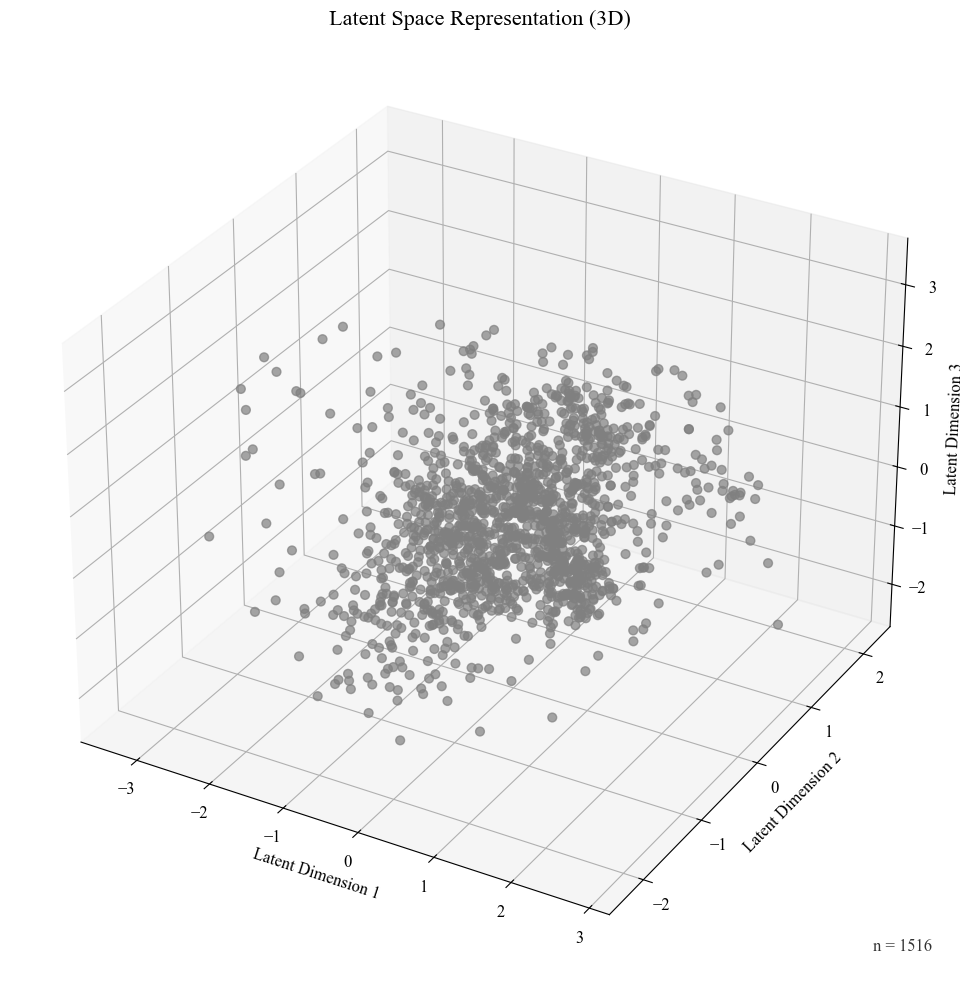

Epochs:   6%|▋         | 16/256 [00:39<11:39,  2.91s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 17/256 | Train Loss: 36.9098 | Val Loss: 41.3591


Epochs:   7%|▋         | 18/256 [00:44<10:11,  2.57s/it]

Epoch 18/256 | Train Loss: 36.1505 | Val Loss: 41.0169


Epochs:   7%|▋         | 19/256 [00:46<09:43,  2.46s/it]

Epoch 19/256 | Train Loss: 35.8917 | Val Loss: 40.6991


Epochs:   8%|▊         | 20/256 [00:48<09:21,  2.38s/it]

Epoch 20/256 | Train Loss: 35.8671 | Val Loss: 38.9547


Epochs:   8%|▊         | 21/256 [00:50<09:05,  2.32s/it]

Epoch 21/256 | Train Loss: 35.4324 | Val Loss: 40.8627


Epochs:   9%|▊         | 22/256 [00:53<09:03,  2.32s/it]

Epoch 22/256 | Train Loss: 35.0005 | Val Loss: 38.9377


Epochs:   9%|▉         | 23/256 [00:55<08:52,  2.29s/it]

Epoch 23/256 | Train Loss: 34.8519 | Val Loss: 39.4527


Epochs:   9%|▉         | 24/256 [00:57<08:42,  2.25s/it]

Epoch 24/256 | Train Loss: 34.4448 | Val Loss: 38.4973


Epochs:  10%|▉         | 25/256 [00:59<08:37,  2.24s/it]

Epoch 25/256 | Train Loss: 34.4768 | Val Loss: 39.0638


Epochs:  10%|█         | 26/256 [01:01<08:29,  2.22s/it]

Epoch 26/256 | Train Loss: 33.9296 | Val Loss: 38.3013


Epochs:  11%|█         | 27/256 [01:04<08:24,  2.20s/it]

Epoch 27/256 | Train Loss: 33.7935 | Val Loss: 38.1203


Epochs:  11%|█         | 28/256 [01:06<08:20,  2.20s/it]

Epoch 28/256 | Train Loss: 33.8614 | Val Loss: 39.3820


Epochs:  11%|█▏        | 29/256 [01:08<08:22,  2.21s/it]

Epoch 29/256 | Train Loss: 33.4285 | Val Loss: 37.6078


Epochs:  12%|█▏        | 30/256 [01:10<08:17,  2.20s/it]

Epoch 30/256 | Train Loss: 33.2826 | Val Loss: 37.8711


Epochs:  12%|█▏        | 31/256 [01:12<08:12,  2.19s/it]

Epoch 31/256 | Train Loss: 33.3923 | Val Loss: 38.3538
Epoch 32/256 | Train Loss: 32.9238 | Val Loss: 38.4286
Generated signals shape: (32, 256)
Epoch 32/256 | Train Loss: 32.9238 | Val Loss: 38.4286
Generated signals shape: (32, 256)


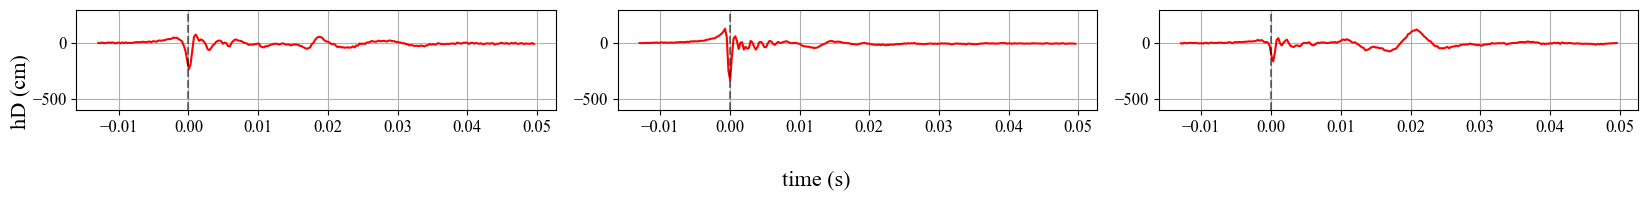

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


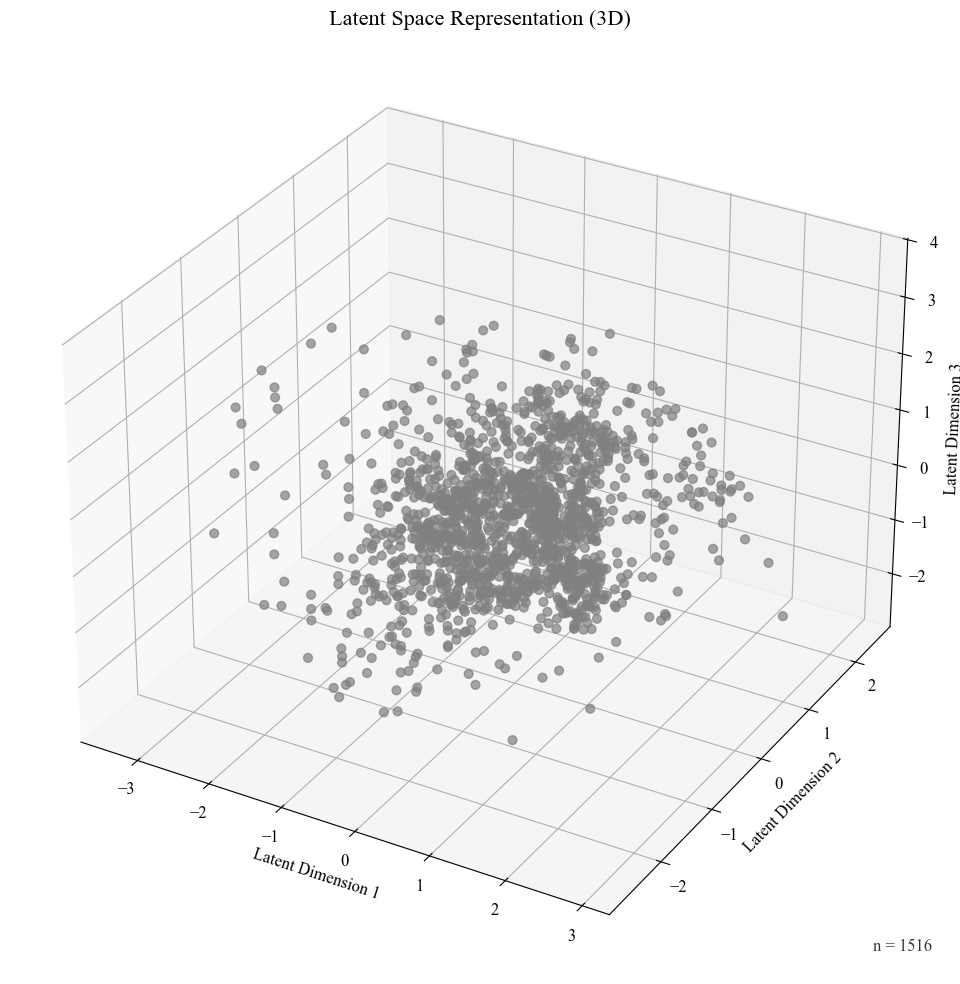

Epochs:  12%|█▎        | 32/256 [01:16<10:03,  2.70s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 33/256 | Train Loss: 32.8754 | Val Loss: 38.2377


Epochs:  13%|█▎        | 34/256 [01:21<09:02,  2.44s/it]

Epoch 34/256 | Train Loss: 32.9826 | Val Loss: 37.0547


Epochs:  14%|█▎        | 35/256 [01:23<08:52,  2.41s/it]

Epoch 35/256 | Train Loss: 32.7003 | Val Loss: 37.8265


Epochs:  14%|█▍        | 36/256 [01:25<08:31,  2.32s/it]

Epoch 36/256 | Train Loss: 32.4520 | Val Loss: 37.4351


Epochs:  14%|█▍        | 37/256 [01:27<08:19,  2.28s/it]

Epoch 37/256 | Train Loss: 32.3810 | Val Loss: 36.1950


Epochs:  15%|█▍        | 38/256 [01:54<34:40,  9.54s/it]

Epoch 38/256 | Train Loss: 32.2510 | Val Loss: 37.3618


Epochs:  15%|█▌        | 39/256 [01:56<26:34,  7.35s/it]

Epoch 39/256 | Train Loss: 32.2835 | Val Loss: 36.9981


Epochs:  16%|█▌        | 40/256 [01:58<21:06,  5.86s/it]

Epoch 40/256 | Train Loss: 32.1739 | Val Loss: 37.1654


Epochs:  16%|█▌        | 41/256 [02:01<17:19,  4.83s/it]

Epoch 41/256 | Train Loss: 32.4230 | Val Loss: 38.2229


Epochs:  16%|█▋        | 42/256 [02:03<14:34,  4.09s/it]

Epoch 42/256 | Train Loss: 31.6937 | Val Loss: 36.3266


Epochs:  17%|█▋        | 43/256 [02:05<12:31,  3.53s/it]

Epoch 43/256 | Train Loss: 31.4277 | Val Loss: 37.5627


Epochs:  17%|█▋        | 44/256 [02:08<11:10,  3.16s/it]

Epoch 44/256 | Train Loss: 31.5807 | Val Loss: 37.7831


Epochs:  18%|█▊        | 45/256 [02:10<10:15,  2.92s/it]

Epoch 45/256 | Train Loss: 31.2037 | Val Loss: 36.5598


Epochs:  18%|█▊        | 46/256 [02:12<09:32,  2.73s/it]

Epoch 46/256 | Train Loss: 31.4200 | Val Loss: 37.0569


Epochs:  18%|█▊        | 47/256 [02:15<09:02,  2.60s/it]

Epoch 47/256 | Train Loss: 31.4256 | Val Loss: 37.1484
Epoch 48/256 | Train Loss: 31.1198 | Val Loss: 37.0271
Generated signals shape: (32, 256)
Epoch 48/256 | Train Loss: 31.1198 | Val Loss: 37.0271
Generated signals shape: (32, 256)


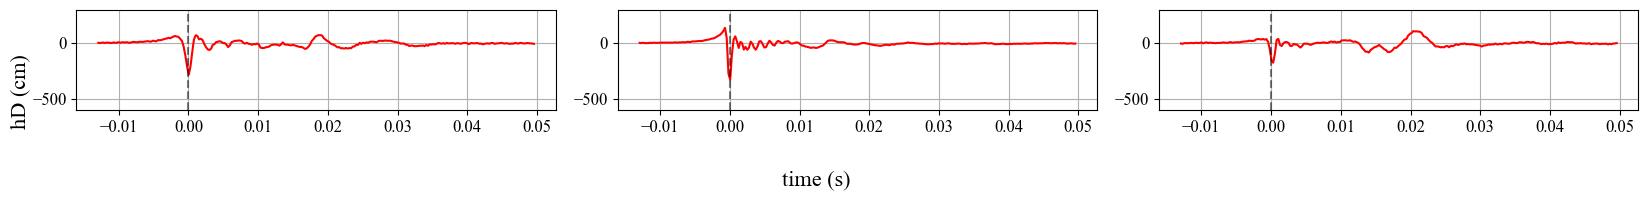

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


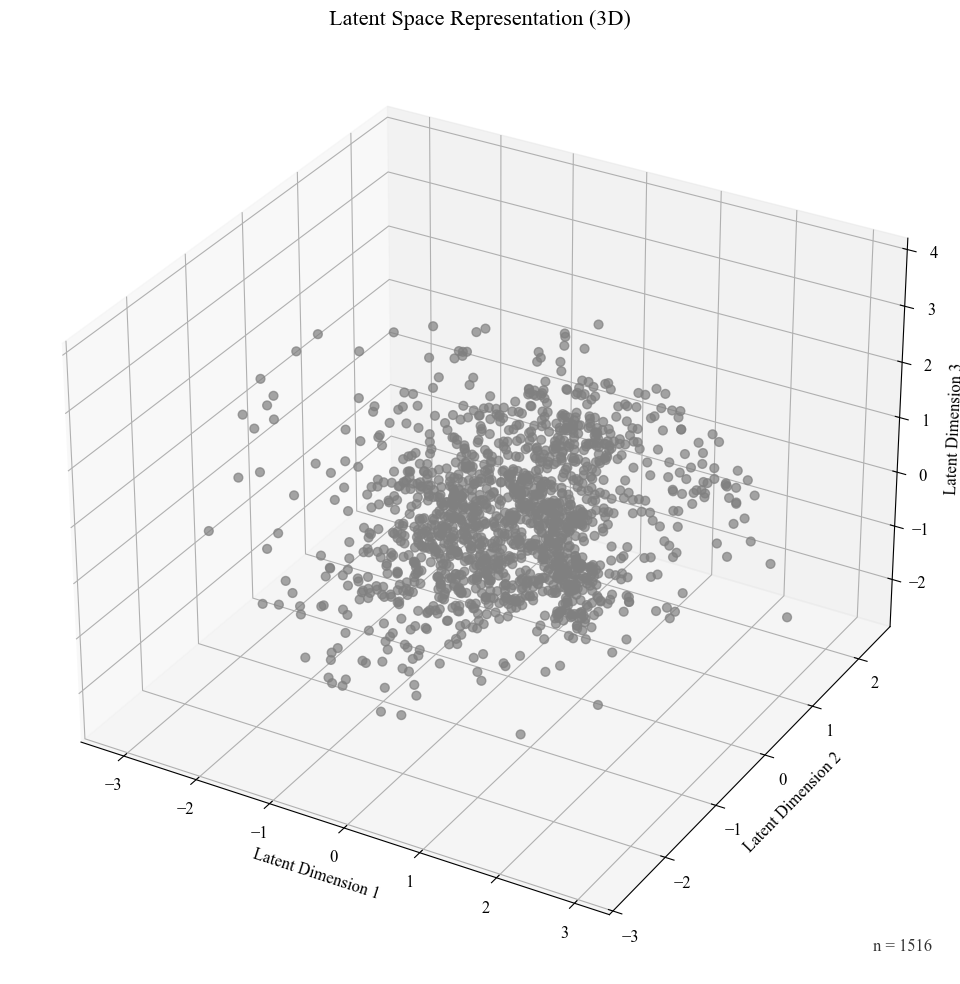

Epochs:  19%|█▉        | 48/256 [02:18<10:17,  2.97s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 49/256 | Train Loss: 29.4038 | Val Loss: 35.2090


Epochs:  20%|█▉        | 50/256 [02:23<08:55,  2.60s/it]

Epoch 50/256 | Train Loss: 29.0422 | Val Loss: 34.4664


Epochs:  20%|█▉        | 51/256 [02:25<08:33,  2.51s/it]

Epoch 51/256 | Train Loss: 28.8963 | Val Loss: 34.5011


Epochs:  20%|██        | 52/256 [02:28<08:18,  2.44s/it]

Epoch 52/256 | Train Loss: 28.7269 | Val Loss: 34.4971


Epochs:  21%|██        | 53/256 [02:30<08:00,  2.37s/it]

Epoch 53/256 | Train Loss: 28.6974 | Val Loss: 34.5037


Epochs:  21%|██        | 54/256 [02:32<07:51,  2.33s/it]

Epoch 54/256 | Train Loss: 28.5489 | Val Loss: 34.1214


Epochs:  21%|██▏       | 55/256 [02:34<07:37,  2.27s/it]

Epoch 55/256 | Train Loss: 28.4846 | Val Loss: 34.8561


Epochs:  22%|██▏       | 56/256 [02:36<07:34,  2.27s/it]

Epoch 56/256 | Train Loss: 28.3536 | Val Loss: 34.3007


Epochs:  22%|██▏       | 57/256 [02:39<07:36,  2.29s/it]

Epoch 57/256 | Train Loss: 28.3441 | Val Loss: 33.7080


Epochs:  23%|██▎       | 58/256 [02:41<07:25,  2.25s/it]

Epoch 58/256 | Train Loss: 28.4783 | Val Loss: 34.2643


Epochs:  23%|██▎       | 59/256 [02:43<07:21,  2.24s/it]

Epoch 59/256 | Train Loss: 28.4749 | Val Loss: 34.3652


Epochs:  23%|██▎       | 60/256 [02:45<07:21,  2.25s/it]

Epoch 60/256 | Train Loss: 28.3715 | Val Loss: 34.2752


Epochs:  24%|██▍       | 61/256 [02:48<07:15,  2.23s/it]

Epoch 61/256 | Train Loss: 28.2938 | Val Loss: 34.0046


Epochs:  24%|██▍       | 62/256 [02:50<07:12,  2.23s/it]

Epoch 62/256 | Train Loss: 28.2732 | Val Loss: 34.1772


Epochs:  25%|██▍       | 63/256 [02:52<07:08,  2.22s/it]

Epoch 63/256 | Train Loss: 28.1579 | Val Loss: 34.2703
Epoch 64/256 | Train Loss: 27.8643 | Val Loss: 34.3608
Generated signals shape: (32, 256)
Epoch 64/256 | Train Loss: 27.8643 | Val Loss: 34.3608
Generated signals shape: (32, 256)


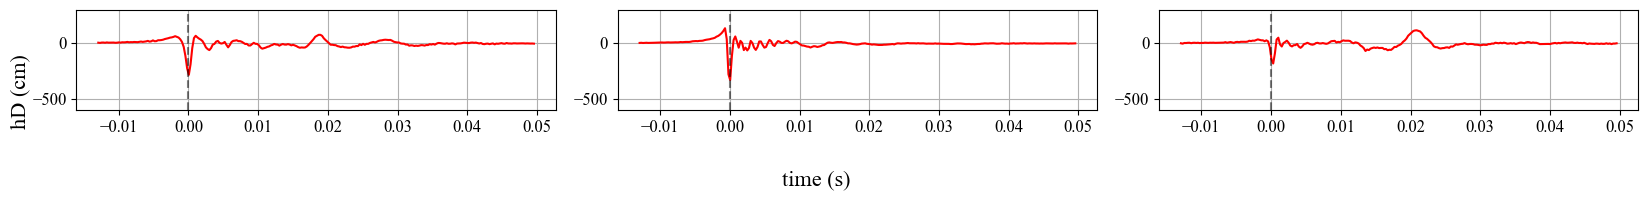

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


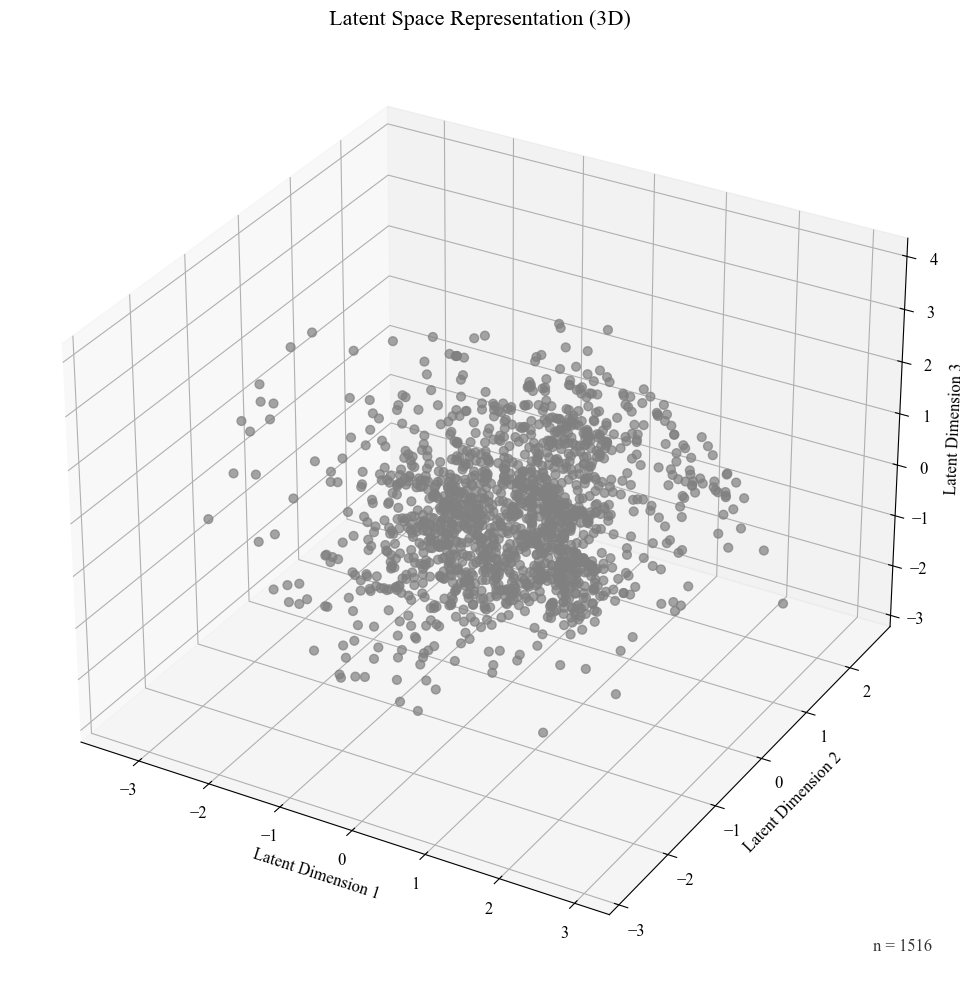

Epochs:  25%|██▌       | 64/256 [02:56<08:49,  2.76s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 65/256 | Train Loss: 27.9696 | Val Loss: 34.8351


Epochs:  26%|██▌       | 66/256 [03:01<07:57,  2.51s/it]

Epoch 66/256 | Train Loss: 28.0862 | Val Loss: 34.0922


Epochs:  26%|██▌       | 67/256 [03:03<07:38,  2.43s/it]

Epoch 67/256 | Train Loss: 28.1154 | Val Loss: 34.4999


Epochs:  27%|██▋       | 68/256 [03:05<07:36,  2.43s/it]

Epoch 68/256 | Train Loss: 27.8270 | Val Loss: 33.6199


Epochs:  27%|██▋       | 69/256 [03:08<07:37,  2.45s/it]

Epoch 69/256 | Train Loss: 28.0343 | Val Loss: 34.0042


Epochs:  27%|██▋       | 70/256 [03:10<07:28,  2.41s/it]

Epoch 70/256 | Train Loss: 27.8052 | Val Loss: 34.2577


Epochs:  28%|██▊       | 71/256 [03:13<07:44,  2.51s/it]

Epoch 71/256 | Train Loss: 27.8306 | Val Loss: 34.2133


Epochs:  28%|██▊       | 72/256 [03:16<08:16,  2.70s/it]

Epoch 72/256 | Train Loss: 27.7519 | Val Loss: 34.1715


Epochs:  29%|██▊       | 73/256 [03:18<07:51,  2.58s/it]

Epoch 73/256 | Train Loss: 27.7185 | Val Loss: 34.3089


Epochs:  29%|██▉       | 74/256 [03:20<07:28,  2.46s/it]

Epoch 74/256 | Train Loss: 27.6883 | Val Loss: 34.8094


Epochs:  29%|██▉       | 75/256 [03:23<07:14,  2.40s/it]

Epoch 75/256 | Train Loss: 27.7892 | Val Loss: 33.6790


Epochs:  30%|██▉       | 76/256 [03:25<07:00,  2.33s/it]

Epoch 76/256 | Train Loss: 27.8170 | Val Loss: 33.6560


Epochs:  30%|███       | 77/256 [03:27<06:53,  2.31s/it]

Epoch 77/256 | Train Loss: 27.5319 | Val Loss: 34.0061


Epochs:  30%|███       | 78/256 [03:30<06:57,  2.35s/it]

Epoch 78/256 | Train Loss: 27.5800 | Val Loss: 34.0088


Epochs:  31%|███       | 79/256 [03:32<06:55,  2.35s/it]

Epoch 79/256 | Train Loss: 27.3463 | Val Loss: 33.6158
Epoch 80/256 | Train Loss: 27.3617 | Val Loss: 33.7152
Generated signals shape: (32, 256)
Epoch 80/256 | Train Loss: 27.3617 | Val Loss: 33.7152
Generated signals shape: (32, 256)


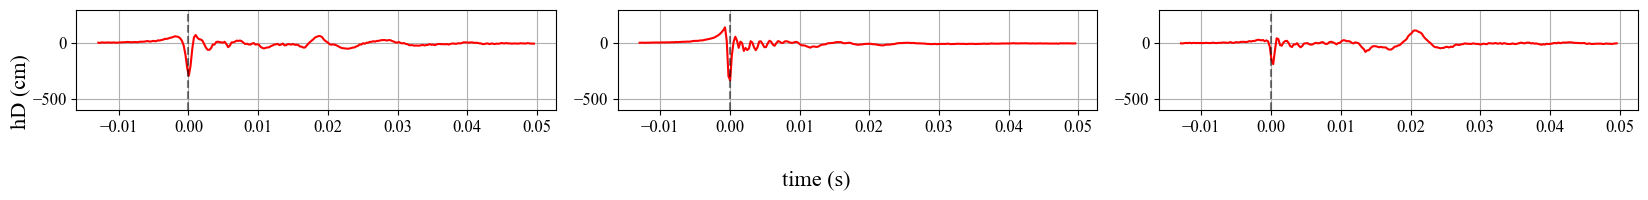

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


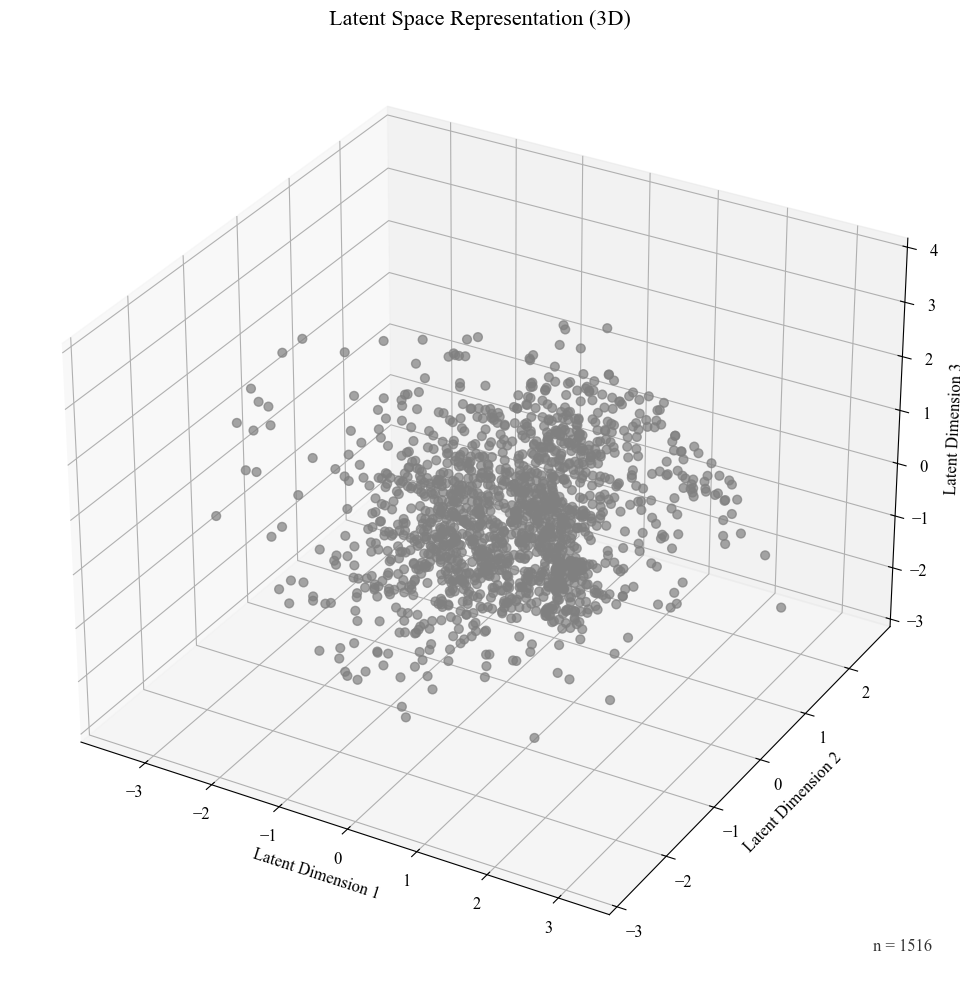

Epochs:  31%|███▏      | 80/256 [03:36<08:14,  2.81s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 81/256 | Train Loss: 27.3792 | Val Loss: 33.4706


Epochs:  32%|███▏      | 82/256 [03:40<07:25,  2.56s/it]

Epoch 82/256 | Train Loss: 27.3594 | Val Loss: 33.8356


Epochs:  32%|███▏      | 83/256 [03:43<07:15,  2.52s/it]

Epoch 83/256 | Train Loss: 27.5101 | Val Loss: 33.5442


Epochs:  33%|███▎      | 84/256 [03:45<06:58,  2.44s/it]

Epoch 84/256 | Train Loss: 27.2299 | Val Loss: 34.0738


Epochs:  33%|███▎      | 85/256 [03:47<06:44,  2.37s/it]

Epoch 85/256 | Train Loss: 27.2014 | Val Loss: 33.9356


Epochs:  34%|███▎      | 86/256 [03:50<06:39,  2.35s/it]

Epoch 86/256 | Train Loss: 27.3328 | Val Loss: 33.4539


Epochs:  34%|███▍      | 87/256 [03:52<06:37,  2.35s/it]

Epoch 87/256 | Train Loss: 27.2096 | Val Loss: 34.0067


Epochs:  34%|███▍      | 88/256 [03:54<06:33,  2.34s/it]

Epoch 88/256 | Train Loss: 27.0924 | Val Loss: 33.9892


Epochs:  35%|███▍      | 89/256 [03:57<06:32,  2.35s/it]

Epoch 89/256 | Train Loss: 27.2066 | Val Loss: 33.7571


Epochs:  35%|███▌      | 90/256 [03:59<06:29,  2.35s/it]

Epoch 90/256 | Train Loss: 27.1613 | Val Loss: 34.0575


Epochs:  36%|███▌      | 91/256 [04:02<06:45,  2.46s/it]

Epoch 91/256 | Train Loss: 27.2103 | Val Loss: 33.7579


Epochs:  36%|███▌      | 92/256 [04:04<06:45,  2.47s/it]

Epoch 92/256 | Train Loss: 27.1571 | Val Loss: 33.5090


Epochs:  36%|███▋      | 93/256 [04:07<06:44,  2.48s/it]

Epoch 93/256 | Train Loss: 27.1811 | Val Loss: 33.9172


Epochs:  37%|███▋      | 94/256 [04:09<06:34,  2.43s/it]

Epoch 94/256 | Train Loss: 26.9543 | Val Loss: 33.6770


Epochs:  37%|███▋      | 95/256 [04:11<06:26,  2.40s/it]

Epoch 95/256 | Train Loss: 27.1652 | Val Loss: 33.4836
Epoch 96/256 | Train Loss: 26.8168 | Val Loss: 33.4033
Generated signals shape: (32, 256)
Epoch 96/256 | Train Loss: 26.8168 | Val Loss: 33.4033
Generated signals shape: (32, 256)


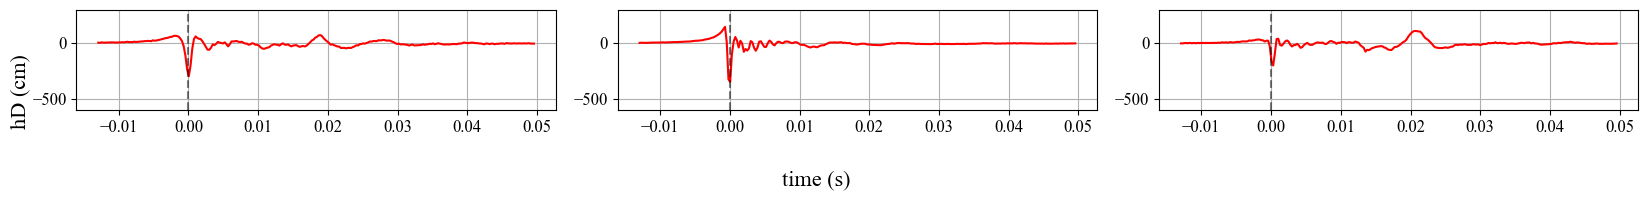

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


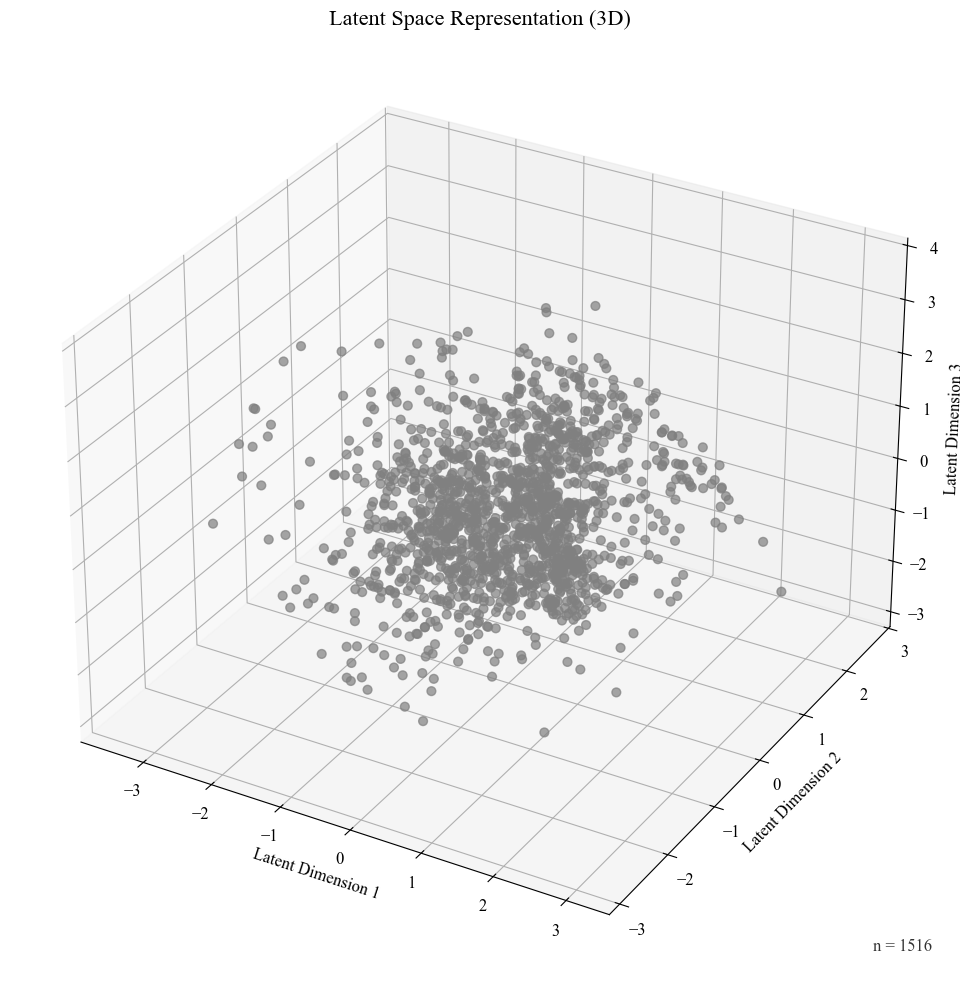

Epochs:  38%|███▊      | 96/256 [04:15<07:46,  2.92s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 97/256 | Train Loss: 26.8670 | Val Loss: 34.0210


Epochs:  38%|███▊      | 98/256 [04:20<06:49,  2.59s/it]

Epoch 98/256 | Train Loss: 26.9261 | Val Loss: 33.8337


Epochs:  39%|███▊      | 99/256 [04:22<06:37,  2.53s/it]

Epoch 99/256 | Train Loss: 26.7929 | Val Loss: 33.2433


Epochs:  39%|███▉      | 100/256 [04:25<06:36,  2.54s/it]

Epoch 100/256 | Train Loss: 26.6952 | Val Loss: 33.5777


Epochs:  39%|███▉      | 101/256 [04:27<06:17,  2.44s/it]

Epoch 101/256 | Train Loss: 26.8142 | Val Loss: 34.0967


In [ ]:
vae_trainer = Trainer(toy=toy, noise=True, curriculum=True)
vae_trainer.train()

### Display Results

In [ ]:
vae_trainer.display_results()

In [ ]:
# plot_latent_morph_up_and_down(
#     vae_trainer.vae,
#     signal_1=ccsn_dataset.__getitem__(800)[0],
#     signal_2=ccsn_dataset.__getitem__(600)[0],
#     max_value=vae_trainer.training_dataset.max_strain,
#     train_dataset=CCSNData(),
#     steps=1
# )

In [ ]:
vae_trainer.plot_generated_signal_distribution(
    background="white",
    font_family="sans-serif",
    font_name="Avenir"
)

In [ ]:
index = 85

val_idx = vae_trainer.validation_sampler.indices[index]
signal, noisy_signal, params = vae_trainer.val_loader.dataset.__getitem__(val_idx)

plot_reconstruction_distribution(
    vae=vae_trainer.vae,
    noisy_signal=noisy_signal,
    true_signal=signal,
    max_value=vae_trainer.validation_dataset.max_strain,
    num_samples=1000,
    background="white",
    font_family="sans-serif",
    font_name="Avenir"
)

In [ ]:
vae_trainer.save_models()

In [ ]:
import math
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from starccato_flow.data.ccsn_data import CCSNData
from starccato_flow.utils.defaults import DEVICE, Z_DIM

from nflows.distributions.normal import StandardNormal
from nflows.transforms import CompositeTransform, ReversePermutation, MaskedAffineAutoregressiveTransform
from nflows.flows import Flow
import torch.optim as optim


def train_npe_with_vae(vae_trainer, num_epochs=20, batch_size=32, lr=1e-4, flow=None):
    """
    Train a MaskedAutoregressiveFlow to estimate p(params | latent)
    """

    vae = vae_trainer.vae
    vae.eval()  # freeze VAE
    param_dim = 4

    num_layers = 10

    # model starts here
    base_dist = StandardNormal(shape=[param_dim])

    # composite transform
    transforms = []
    for i in range(num_layers):
        if i % 2 == 0:
            transforms.append(ReversePermutation(features=param_dim))
        transforms.append(
            MaskedAffineAutoregressiveTransform(
                features=param_dim,
                hidden_features=128,
                context_features=Z_DIM,
            )
        )

    transform = CompositeTransform(transforms)

    # create flow on CPU first, in float32
    flow = Flow(transform, base_dist)

    # move to device explicitly, MPS requires float32
    flow = flow.to(DEVICE, dtype=torch.float32)

    # model ends here

    optimizer = optim.Adam(flow.parameters(), lr=lr)

    ccsn_loader = DataLoader(
        CCSNData(noise=True, curriculum=False),
        batch_size=batch_size,
        shuffle=True,
        drop_last=True,
    )

    for epoch in range(num_epochs):
        total_loss = 0.0

        for batch_idx, (signal, noisy_signal, params) in enumerate(ccsn_loader):
            signal = signal.to(DEVICE).float()
            noisy_signal = noisy_signal.to(DEVICE).float()
            params = params.to(DEVICE).float()
            # take only the first param
            # params = params[:, :, 0:1]
            params = torch.log(params + 1e-8)  # log-transform
            # params = params[:, :, 0]

            # Encode signal into latent space
            with torch.no_grad():
                _, mean, log_var = vae(noisy_signal)
                mean = mean.view(mean.size(0), -1)
                log_var = log_var.view(log_var.size(0), -1)
                # z_latent = vae.reparameterization(mean, log_var)
                # z_latent = z_latent.view(z_latent.size(0), -1)


            # p(params | z)
            params = params.view(params.size(0), -1) 
            # z_latent = z_latent.view(z_latent.size(0), -1) 

            optimizer.zero_grad(set_to_none=True)

            log_prob = flow.log_prob(params, context=mean) # this conditions the flow on the latent variable z
            loss = -log_prob.mean()

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}] | Flow NLL: {total_loss / len(ccsn_loader):.4f}")

    return flow

npe_flow = train_npe_with_vae(vae_trainer, num_epochs=400, batch_size=32, lr=5e-4)

### Sample

In [ ]:
import torch
import matplotlib.pyplot as plt

from starccato_flow.plotting.plotting_defaults import GENERATED_SIGNAL_COLOUR, SIGNAL_COLOUR

vae_trainer.vae.eval()
npe_flow.eval()

from torch.utils.data import DataLoader
from starccato_flow.data.ccsn_data import CCSNData
from starccato_flow.utils.defaults import DEVICE

index = 120

signal = vae_trainer.training_dataset.__getitem__(index)[0]
noisy_signal = vae_trainer.training_dataset.__getitem__(index)[1]
params = vae_trainer.training_dataset.__getitem__(index)[2]

# Ensure batch dimension [B, C, T]
if noisy_signal.dim() == 2:
    noisy_signal = noisy_signal.unsqueeze(0)

with torch.no_grad():
    noisy_signal = noisy_signal.to(DEVICE).float()
    signal = signal.to(DEVICE).float()
    _, mean, log_var = vae_trainer.vae(noisy_signal)
    # z = vae_trainer.vae.reparameterization(mean, torch.exp(0.5 * log_var))
    # recon = vae_trainer.vae.decoder(z)
    # _, mean, log_var = vae_trainer.vae(recon)

    # Sample from flow conditioned on z
    num_draws = 1000

    context = mean.view(1, -1)
    samples = npe_flow.sample(num_samples=num_draws, context=context)
    samples = samples.reshape(num_draws, -1)  # -> [num_draws, 2]

    samples_cpu = samples.detach().cpu()
    samples_cpu[:, [0, 2, 3]] = torch.exp(samples_cpu[:, [0, 2, 3]])  # Transform back to positive space
    samples_cpu = samples_cpu.numpy()
    true_params = params.detach().cpu() if torch.is_tensor(params) else params
    true_params = true_params.flatten()  # Flatten to [2] from [1, 2]
    true_params[1] = torch.log(true_params[1] + 1e-8)  # log-transform
    
    print("True params:", true_params)
    # print("Mean predicted:", samples_cpu.mean(dim=0))
    # print("Std predicted:", samples_cpu.std(dim=0))
    
    # Plot histogram of first parameter
    # plt.figure(figsize=(10, 6))
    # plt.hist(samples_cpu[:, 0].numpy(), bins=50, alpha=0.7, edgecolor='black')
    # plt.axvline(true_params[0].item(), color='red', linestyle='--', linewidth=2, label=f'True value: {true_params[0].item():.3f}')
    # plt.axvline(samples_cpu[:, 0].mean().item(), color='green', linestyle='--', linewidth=2, label=f'Predicted mean: {samples_cpu[:, 0].mean().item():.3f}')
    # plt.xlim(0, 0.25)
    # plt.xlabel('Parameter 1 Value')
    # plt.ylabel('Frequency')
    # plt.title('Posterior Distribution of Parameter 1')
    # plt.legend()
    # plt.grid(True, alpha=0.3)
    # plt.show()

    # # Plot histogram of first parameter
    # plt.figure(figsize=(10, 6))
    # plt.hist(samples_cpu[:, 1].numpy(), bins=5000, alpha=0.7, edgecolor='black')
    # plt.axvline(true_params[1].item(), color='red', linestyle='--', linewidth=2, label=f'True value: {true_params[1].item():.3f}')
    # plt.axvline(samples_cpu[:, 1].mean().item(), color='green', linestyle='--', linewidth=2, label=f'Predicted mean: {samples_cpu[:, 1].mean().item():.3f}')
    # plt.xlim(0, 10000)
    # plt.xlabel('Parameter 1 Value')
    # plt.ylabel('Frequency')
    # plt.title('Posterior Distribution of Parameter 1')
    # plt.legend()
    # plt.grid(True, alpha=0.3)
    # plt.show()


plt.rcParams['figure.facecolor'] = 'none' # Transparent figure background
plt.rcParams['axes.facecolor'] = 'black' # Black subplot backgrounds
plt.rcParams['savefig.facecolor'] = 'none' # Also transparent when saving
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

truth_colour = SIGNAL_COLOUR
distribution_colour = GENERATED_SIGNAL_COLOUR

print(true_params.detach().cpu().numpy())


figure = corner.corner(
    samples_cpu,
    labels=[
        r"$\beta_{IC}^b$",
        r"$log(A)$",
        r"$ye_{b,c}$",
        r"$\omega_0$"
    ],
    range=[(0, 0.25), (0, math.log(10000)), (0, 0.3), (0, 16)],
    truths=true_params[:4].numpy(),
    truth_color=truth_colour,
    show_titles=True,
    title_quantiles=[0.16, 0.5, 0.84],  # ← ADD THIS LINE
    title_fmt='.4f',
    bins=100,
    smooth=3,
    color=distribution_colour,
    hist_kwargs={'density': False, 'alpha': 1.0},
    levels=(0.68, 0.95),
    fill_contours=True,
    plot_datapoints=False
)

# Fill hist patches
for ax in figure.get_axes():
    for patch in ax.patches:
        patch.set_facecolor("white")
        patch.set_alpha(1.0)

# **Make axis lines white**
for ax in figure.get_axes():
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

# Transparent canvas
figure.patch.set_alpha(1.0)

figure.subplots_adjust(hspace=0.0, wspace=0.0)  # adjust spacing

plt.savefig("plots/npe_posterior_corner_plot.svg", dpi=300, bbox_inches='tight', transparent=True)
plt.show()
